In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def compute_cost(X, y, beta):
    
    #X is the population X = x1, x2, x3... xn
    #X has the shape [beta, pop]
    #beta has this shape [b1, b2]
    #hb(pop) = profit predicted
    
    n    = len(X)
    sumt = 0
    
    hb   = (X * beta.T) - y   
    isso = np.multiply(hb,hb)
    sumt = np.sum(isso)  
    
    Jb = sumt/(2*n)
    return Jb
    

In [3]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost       = np.zeros(iters)
    n          = X.shape[0]
    sumt       = 0
    
    
    for i in range(iters):
        dif  = (X * theta.T) - y
        
        for j in range(parameters):
            mult = np.multiply(dif, X[:,j])
            sumt = np.sum(mult) 
            temp[0,j] = theta[0,j] - ((alpha/n) * sumt)

        theta = temp       
        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost

# Data 2 with One Feature

In [4]:
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
#data.head()

In [5]:
data = (data - data.mean()) / data.std()
#data.head()

Text(0,0.5,'House Price')

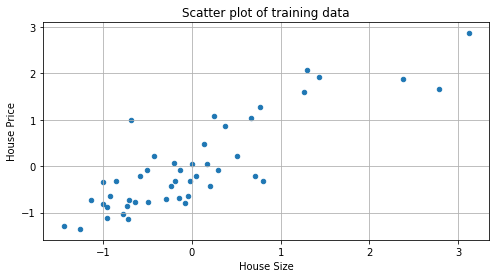

In [6]:
ax = data.plot(kind='scatter', x='Size', y='Price', title='Scatter plot of training data', figsize=(8,4),grid=True);
ax.set_xlabel('House Size')
ax.set_ylabel('House Price')

In [7]:
data.insert(0, 'beta zero', 1)

In [42]:
cols = data.shape[1]
X = data.iloc[:, :cols-2]
y = data.iloc[:, cols-1:cols]

In [43]:
X.head()

,beta zero,Size
0,1,0.130010
1,1,-0.504190
2,1,0.502476
3,1,-0.735723
4,1,1.257476


In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

In [11]:
compute_cost(X, y, beta)

0.48936170212765967

In [12]:
alpha = 0.01
iters = 1500

In [13]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
g

matrix([[-1.11299858e-16,  8.54987258e-01]])

In [14]:
compute_cost(X, y, g)

0.13163644613968883

# Data 2 with Multiple Features

In [15]:
cols2 = data.shape[1]
X2 = data.iloc[:,0:cols2-1]
y2 = data.iloc[:,cols2-1:cols2]

In [16]:
#X2.head()

In [17]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
beta = np.matrix(np.array([0,0,0]))

In [18]:
compute_cost(X2, y2, beta)

0.48936170212765967

In [19]:
g, cost = gradient_descent(X2, y2, beta, alpha, iters)
g

matrix([[-1.10585300e-16,  8.84042349e-01, -5.24551809e-02]])

In [20]:
compute_cost(X2, y2, g)

0.13068670606095903